In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from reinforcement_learning_example.trainer import Trainer
from reinforcement_learning_example.agent import DeepQNetwork, Agent

import logging
logging.getLogger('reinforcement_learning_example').setLevel(logging.DEBUG)

In [1]:
import gym
env_factory = lambda : gym.make("LunarLander-v2")#.unwrapped
env = env_factory()
num_actions = env.action_space.n
observation_space_shape = env.observation_space.shape
env.close()


In [4]:

gamma = 0.99
input_dims = observation_space_shape
batch_size = 64
update_target_every_n_steps = 10_000

from reinforcement_learning_example.agent import exponential_decay
epsilon_update_function = exponential_decay

network_kwargs = {
    'learning_rate': 0.001,
    'input_dims': input_dims,
    'num_actions': num_actions,
    'fc1_dims': 256,
    'fc2_dims': 256,
}

epsilon_update_kwargs = {"start": 1, "end": 0.05, "decay": 2000}

agent = Agent(network=DeepQNetwork,
              network_kwargs=network_kwargs,
              gamma=gamma,
              input_dims=input_dims,
              num_actions=num_actions,
              update_target_every_n_steps=update_target_every_n_steps,
              batch_size=batch_size,
              epsilon_update_function = epsilon_update_function,
              epsilon_update_kwargs=epsilon_update_kwargs)

2022-04-17 00:02:49 - rle.a:176 - DEBUG - Updating target network.


In [5]:

trainer = Trainer(agent=agent, env_factory=env_factory)

episode_num     1 / episode     0 / score  -394.82 / average score  -394.82 / epsilon 0.99 / num_steps 94.00
episode_num     2 / episode     1 / score  -103.64 / average score  -249.23 / epsilon 0.95 / num_steps 74.00
episode_num     3 / episode     2 / score  -113.08 / average score  -203.85 / epsilon 0.92 / num_steps 70.00
episode_num     4 / episode     3 / score  -177.99 / average score  -197.39 / epsilon 0.85 / num_steps 158.00
episode_num     5 / episode     4 / score  -159.88 / average score  -189.88 / epsilon 0.81 / num_steps 105.00
episode_num     6 / episode     5 / score  -137.45 / average score  -181.14 / epsilon 0.76 / num_steps 133.00
episode_num     7 / episode     6 / score  -154.05 / average score  -177.27 / epsilon 0.72 / num_steps 125.00
episode_num     8 / episode     7 / score  -124.05 / average score  -170.62 / epsilon 0.69 / num_steps 105.00
episode_num     9 / episode     8 / score  -121.49 / average score  -165.16 / epsilon 0.64 / num_steps 142.00
episode_num  

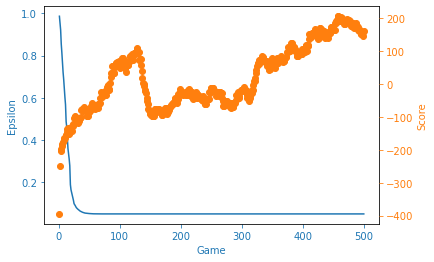

In [6]:
trainer.train(num_episodes=500)

2022-04-16 22:46:08 - rle.a:174 - DEBUG - Updating target network.
episode_num     1 / episode     0 / score  -353.23 / average score  -353.23 / epsilon 0.98
2022-04-16 22:46:08 - rle.a:174 - DEBUG - Updating target network.
episode_num     2 / episode     1 / score  -204.15 / average score  -278.69 / epsilon 0.92
2022-04-16 22:46:08 - rle.a:174 - DEBUG - Updating target network.
episode_num     3 / episode     2 / score  -118.27 / average score  -225.22 / epsilon 0.88
2022-04-16 22:46:08 - rle.a:174 - DEBUG - Updating target network.
episode_num     4 / episode     3 / score   -34.50 / average score  -177.54 / epsilon 0.84
2022-04-16 22:46:09 - rle.a:174 - DEBUG - Updating target network.
episode_num     5 / episode     4 / score  -196.90 / average score  -181.41 / epsilon 0.79
2022-04-16 22:46:09 - rle.a:174 - DEBUG - Updating target network.
episode_num     6 / episode     5 / score  -203.18 / average score  -185.04 / epsilon 0.76
2022-04-16 22:46:09 - rle.a:174 - DEBUG - Updating t

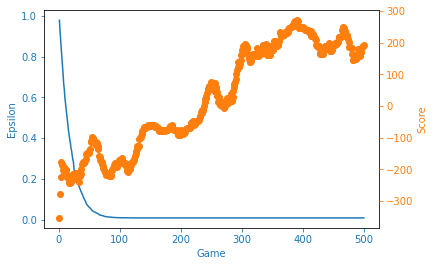

In [6]:
trainer.train(num_episodes=500)

episode_num   265 / episode     0 / score   -18.39 / average score    64.07 / epsilon 0.01
episode_num   266 / episode     1 / score   248.96 / average score    67.21 / epsilon 0.01
episode_num   267 / episode     2 / score   254.87 / average score    69.73 / epsilon 0.01
episode_num   268 / episode     3 / score  -151.78 / average score    66.18 / epsilon 0.01
episode_num   269 / episode     4 / score   200.89 / average score    65.77 / epsilon 0.01
episode_num   270 / episode     5 / score   161.20 / average score    68.33 / epsilon 0.01
episode_num   271 / episode     6 / score   260.71 / average score    71.24 / epsilon 0.01
episode_num   272 / episode     7 / score  -225.02 / average score    69.65 / epsilon 0.01
episode_num   273 / episode     8 / score   240.91 / average score    72.25 / epsilon 0.01
episode_num   274 / episode     9 / score  -115.44 / average score    71.49 / epsilon 0.01
episode_num   275 / episode    10 / score   294.84 / average score    76.73 / epsilon 0.01

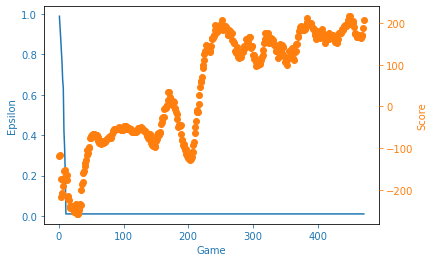

In [9]:
trainer.train(num_episodes=500)

In [ ]:
from reinforcement_learning_example.trainer_old_old import main

main()

In [ ]:
from reinforcement_learning_example.trainer_old_old import main

main()

In [7]:
import gym

# env = trainer.env
env = gym.make('LunarLander-v2')

# env.close()
agent = trainer.agent
try:
    for i_episode in range(10):
        observation = env.reset()
        t = 0
        while True:
            env.render()
            # print(observation)
            # action = env.action_space.sample()
            action = agent.choose_action(observation, use_epsilon_exploration = False)
            observation, reward, done, info = env.step(action)
            t += 1
            if done:
                print("Episode finished after {} timesteps".format(t))
                break
finally:
    env.close()

Episode finished after 306 timesteps
Episode finished after 1000 timesteps
Episode finished after 657 timesteps
Episode finished after 328 timesteps
Episode finished after 726 timesteps
Episode finished after 344 timesteps
Episode finished after 674 timesteps
Episode finished after 260 timesteps
Episode finished after 338 timesteps
Episode finished after 399 timesteps
